In [11]:
# PIKE: I will analyze the data in blair-l's 'meetings' folder

In [12]:
# PIKE: First, I will read in the files from this folder and store their pathnames in a new list

import os

root_path = '/home/EDSE-brandmr-workspace/Enron_dataset/maildir/blair-l/meetings'

count_emails = 0
full_filepath = []

for dirs, subdirs, files in os.walk(root_path):
    count_emails += len(files)
    for f in files:
        full_filepath.append(os.path.join(dirs,f))

print("Number of emails: ",len(full_filepath))

Number of emails:  1120


In [13]:
# PIKE: Next, I will have the computer read through each of the emails from each filepath and pull out relevant data like
# To, From, Subject, Date, and Body of the email and store them in a dictionary

from email.parser import Parser

to_read = ""
emails_to = []
emails_from = []
emails_subject = []
emails_body = []
emails_path = []
emails_date = []

emails = {}
i = -1

for path in full_filepath:
    i += 1
    to_read = path
    with open(to_read, "r") as f:
        data = f.read()
    email = Parser().parsestr(data)
    to1 = email['to']
    emails_to.append(to1)
    if to1 is None:
        to1 = "To: N/A"        
    else:
        to1 = "To: "+to1
    from1 = email['from']
    emails_from.append(from1)
    from1 = "From: "+from1
    subject1 = email['subject']
    emails_subject.append(subject1)
    if subject1 !="":
        subject1 = "Subject: "+subject1
    else:
        subject1 = "Subject: N/A"
    date1 = email['date']
    emails_date.append(date1)
    date1 = "Date: "+date1
    body1 = email.get_payload()
    emails_body.append(body1)
    body1 = "Body: "+body1
    emails_path.append(path)
    emails[i] = from1,to1,subject1,date1,
    
#(I know I never used the dictionary in this example, but I spent a lot of time to create it so I'm keeping it!)

In [21]:
#PIKE: Then I will create a pandas dataframe from the collected data
# (this code pulled from geeksforgeeks.org/create-a-pandas-dataframe-from-lists/)

import pandas as pd

Emails_DataFrame = pd.DataFrame(list(zip(emails_path,emails_date,emails_from,emails_to,emails_subject,emails_body)),
                               columns = ["Path","Date","From","To","Subject","Body"])

Emails_DataFrame.head()

,Path,Date,From,To,Subject,Body
0,/home/EDSE-brandmr-workspace/Enron_dataset/mai...,"Wed, 27 Jun 2001 16:02:00 -0700 (PDT)",outlook.team@enron.com,None,TMS Weekly Mtg. Conference room EB4102,CALENDAR ENTRY:\tAPPOINTMENT\n\nDescription:\n...
1,/home/EDSE-brandmr-workspace/Enron_dataset/mai...,"Wed, 27 Jun 2001 16:02:00 -0700 (PDT)",outlook.team@enron.com,None,Ava-35842/Market Services Council Mtg. confere...,CALENDAR ENTRY:\tAPPOINTMENT\n\nDescription:\n...
2,/home/EDSE-brandmr-workspace/Enron_dataset/mai...,"Wed, 27 Jun 2001 16:02:00 -0700 (PDT)",outlook.team@enron.com,None,Bob Gifford/Mobil/Exxon Audit Meeting EB3907,CALENDAR ENTRY:\tAPPOINTMENT\n\nDescription:\n...
3,/home/EDSE-brandmr-workspace/Enron_dataset/mai...,"Wed, 27 Jun 2001 16:02:00 -0700 (PDT)",outlook.team@enron.com,None,Sheila Nacey & Bob Martinez to meet in Lynn's ...,CALENDAR ENTRY:\tAPPOINTMENT\n\nDescription:\n...
4,/home/EDSE-brandmr-workspace/Enron_dataset/mai...,"Wed, 27 Jun 2001 16:02:00 -0700 (PDT)",outlook.team@enron.com,None,,CALENDAR ENTRY:\tEVENT\n\nDescription:\n\t\n\n...


In [38]:
#PIKE: Let's see when these emails were sent...

unique_date = set(emails_date)
unique_date

{'Mon, 10 Sep 2001 20:59:49 -0700 (PDT)',
 'Thu, 20 Sep 2001 08:18:34 -0700 (PDT)',
 'Wed, 27 Jun 2001 16:02:00 -0700 (PDT)'}

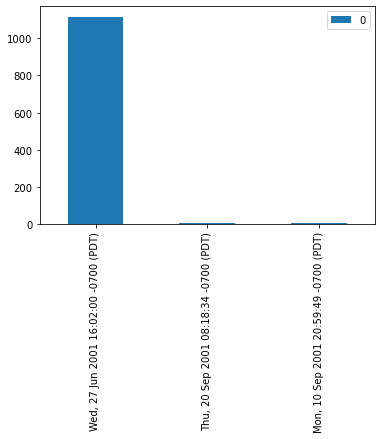

In [43]:
#PIKE: And then let's graph the distribution of these emails by date...
# (this code is from https://stackoverflow.com/questions/28418988/how-to-make-histogram-from-a-list-of-strings-in-python)

from collections import Counter

email_date_counter = Counter(emails_date)

email_date_counter_DF = pd.DataFrame.from_dict(email_date_counter, orient = 'index')
email_date_counter_DF.plot(kind='bar')

In [ ]:
#PIKE: And we see that the majority of the emails (by a considerable margin) are from the same date: 27 JUN 2001